In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import Image

# iris dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


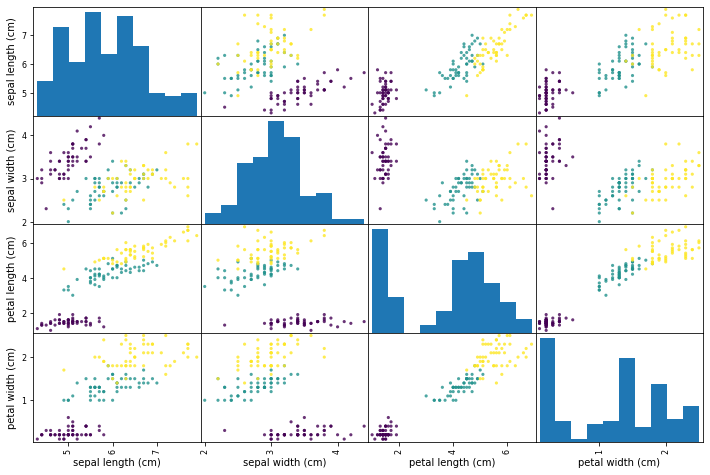

In [5]:
pd.plotting.scatter_matrix(df, c=iris['target'], marker='o', s=10, alpha=.8, figsize=(12, 8))
plt.show()

In [6]:
X = iris.data
Y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [7]:
print(target_names)

['setosa' 'versicolor' 'virginica']


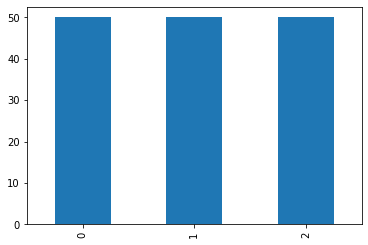

In [8]:
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)
df_Y[0].value_counts().plot(kind='bar')
plt.show()

c:\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


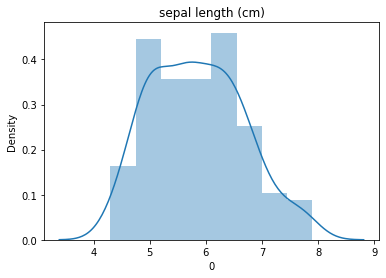

c:\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


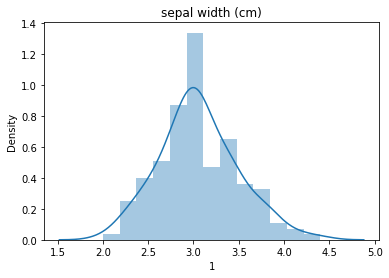

c:\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


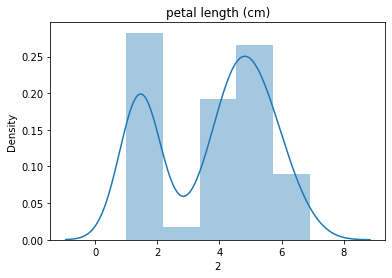

c:\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


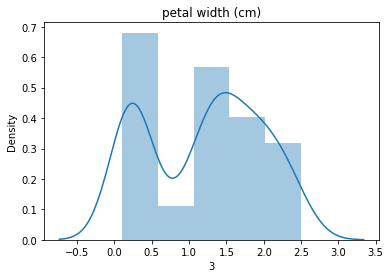

In [9]:
import seaborn as sns
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

# PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [10]:
pca = PCA(n_components=2)
pca.fit(X)
PC_score = pca.transform(X)

print(PC_score[:5])
print(PC_score.shape)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
(150, 2)


In [11]:
# pca 의 eigen_vector
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

# TODO 1

2차원 데이터가 주어졌을때 이를 scatter 하는 함수를 구현하시오.

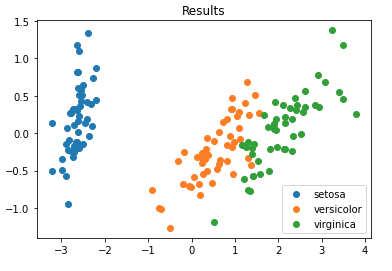

In [12]:
# 아래 그림은 정답 예시
Image("show2D_sample.png")

In [13]:
# Hint
# plt.legend(), plt.title(), plt.scatter() 함수 이용

def show2D(pca_score, Y, target_names):
    plt.figure()
    # TODO -->
    size = len(target_names)
    plt.title('Result')
    for i in range(size):
        plt.scatter(pca_score[Y == i,0], pca_score[Y == i,1], marker='o', s=30)
    plt.legend(target_names, loc='lower right')
    # <--

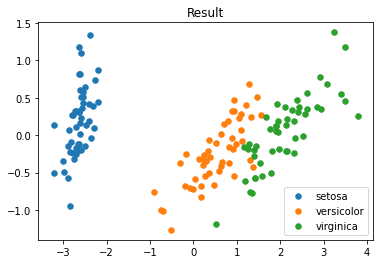

In [14]:
show2D(PC_score, Y, target_names)

# TODO 2

PCA 함수를 구현하시오.

## 요구사항
1. normalize 한 
2. 아래의 numpy 내장 함수 사용 가능
    - ```numpy.mean()```
    - ```numpy.linalg.eig()```
    - ```numpy.dot()```

In [15]:
def student_pca(X, n_components=2):
    pca_results = None
    # TODO -->
    # preprocessing
    tmp_X = X.copy()
    tmp_X -= tmp_X.mean(axis=0)
    cov_X = np.cov(tmp_X.T)
    
    # eigen val, vec
    eigen_value, eigen_vector = np.linalg.eig(cov_X)
    eigen_vector = eigen_vector[:, :n_components]
    pca_results = np.dot(tmp_X, eigen_vector)
    # <--
    return pca_results

pca_student_score = student_pca(X, n_components=2)

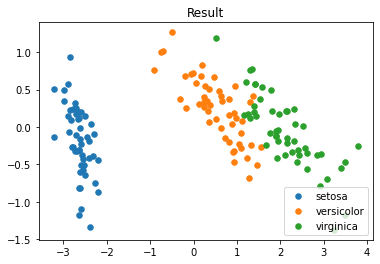

In [16]:
show2D(pca_student_score, Y, target_names)

# TODO 3

digits data 를 이용하여 PCA 결과를 확인하시오.

In [17]:
digits = datasets.load_digits()

In [18]:
# TODO -->
df2 = pd.DataFrame(digits['data'], columns=digits['feature_names'])

In [19]:
# assign
new_X = digits.data
new_Y = digits.target
feature_names = digits.feature_names
target_names = digits.target_names

In [20]:
pca_student_digits = student_pca(new_X, n_components=2)

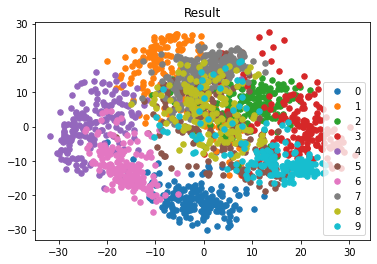

In [21]:
show2D(pca_student_digits, new_Y, target_names)

# <--

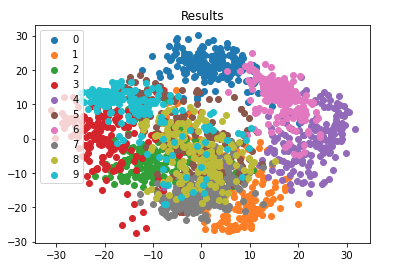

In [22]:
# 예시 정답
Image('digits_sample.png')

# TODO 4

TSNE 를 이용하여 digits 데이터의 결과를 Visualizing 하시오.

In [23]:
from sklearn.manifold import TSNE

c:\python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


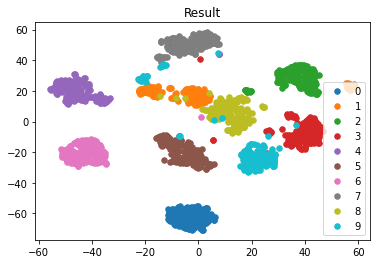

In [24]:
tsne = TSNE(n_components = 2)
digits_tsne = TSNE().fit_transform(new_X)
show2D(digits_tsne, new_Y, target_names)

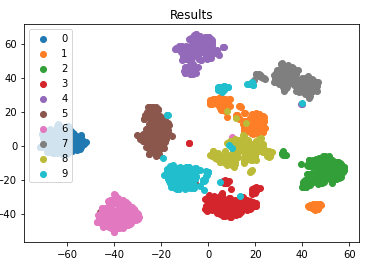

In [25]:
# 예시 정답
Image('tsne_sample.png')

# 과제 : PCA Reconstruction# 과제 : PCA reconstruction

Digits 데이터를 2차원, 3차원, 4차원, 32차원으로 PCA 한 결과를 reconstruction 했을 때 원래 데이터와의 MSE(Mean Square Error) 을 확인 및 복원데이터를 시각화하고 오차율이 다른 이유를 분석하여 보고서를 제출하시오. (코드, 분석내용 첨부)

- 제출형식: {분반}_{학번}_{이름}.zip (ex: 1_20210928_홍길동.zip)
- 제출파일: 보고서({분반}_{학번}_{이름}.pdf), 주피터노트북 파일({분반}_{학번}_{이름}.ipynb)
- 제출기한: 일주일 (사이버캠퍼스 참고)

In [26]:
digits = datasets.load_digits()

In [27]:
X = digits.data
Y = digits.target
feature_names = digits.feature_names
target_names = digits.target_names
n_samples = X.shape[0]
images = X.reshape((n_samples, -1))

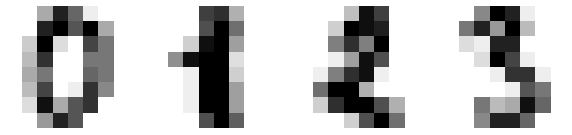

In [28]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

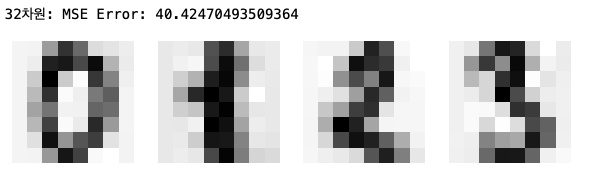

In [29]:
# 예시
Image('assignment_sample.png')

In [30]:
# TODO --> 
def reconstruct(X, pca_X, n_components=2):
    reconstruction = None
    tmp_X = X.copy()
    tmp_X -= tmp_X.mean(axis=0)
    tmp_X_cov = np.cov(tmp_X.T)
    
    eigval, eigvec = np.linalg.eig(tmp_X_cov)
    
    eigvec = eigvec[:, :n_components]
    reconstruction = np.dot(pca_X, eigvec.T)
    reconstruction = reconstruction + X.mean(axis=0)
    
    return reconstruction


2차원: MSE Error: 13.421012200761453


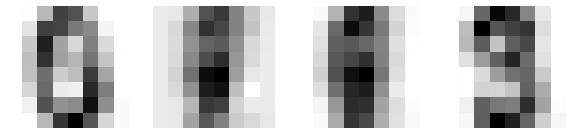

In [31]:
# 2차원
pca_student_digits = student_pca(X, n_components=2)
pca_reconstructed = reconstruct(X, pca_student_digits, n_components=2)

# MSE 출력
mse = np.square(np.subtract(X, pca_reconstructed)).mean()
print(f'2차원: MSE Error: {mse}')

# 시각화
n_samples = pca_reconstructed.shape[0]
images = pca_reconstructed.reshape((n_samples, -1))

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

3차원: MSE Error: 11.206800697129161


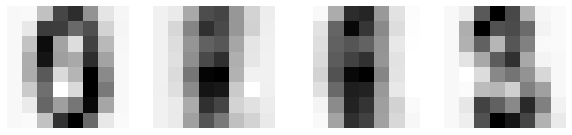

In [32]:
# 3차원
pca_student_digits = student_pca(X, n_components=3)
pca_reconstructed = reconstruct(X, pca_student_digits, n_components=3)

# MSE 출력
mse = np.square(np.subtract(X, pca_reconstructed)).mean()
print(f'3차원: MSE Error: {mse}')

# 시각화
n_samples = pca_reconstructed.shape[0]
images = pca_reconstructed.reshape((n_samples, -1))

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

4차원: MSE Error: 9.62798640712921


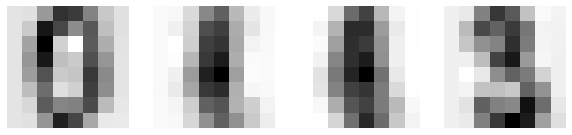

In [33]:
# 4차원
pca_student_digits = student_pca(X, n_components=4)
pca_reconstructed = reconstruct(X, pca_student_digits, n_components=4)

# MSE 출력
mse = np.square(np.subtract(X, pca_reconstructed)).mean()
print(f'4차원: MSE Error: {mse}')

# 시각화
n_samples = pca_reconstructed.shape[0]
images = pca_reconstructed.reshape((n_samples, -1))

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

32차원: MSE Error: 0.6316360146108383


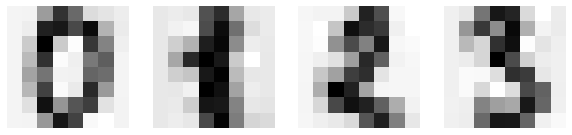

In [34]:
# 32차원
pca_student_digits = student_pca(X, n_components=32)
pca_reconstructed = reconstruct(X, pca_student_digits, n_components=32)

# MSE 출력
mse = np.square(np.subtract(X, pca_reconstructed)).mean()
print(f'32차원: MSE Error: {mse}')

# 시각화
n_samples = pca_reconstructed.shape[0]
images = pca_reconstructed.reshape((n_samples, -1))

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')